In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from swarmANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


<H1>Przygotowanie zbioru danych: XOR<H1>

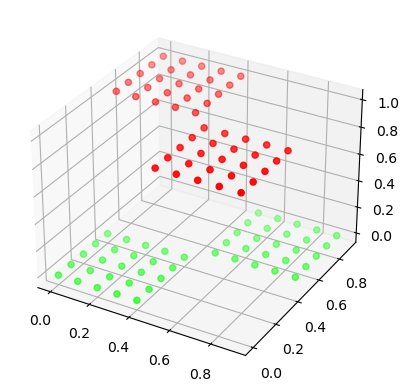

In [2]:
x = np.arange(0, 1, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

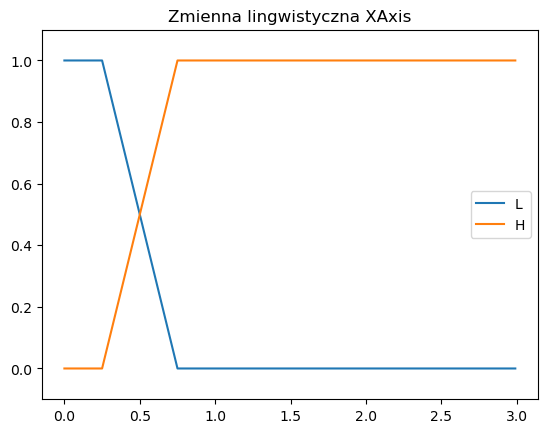

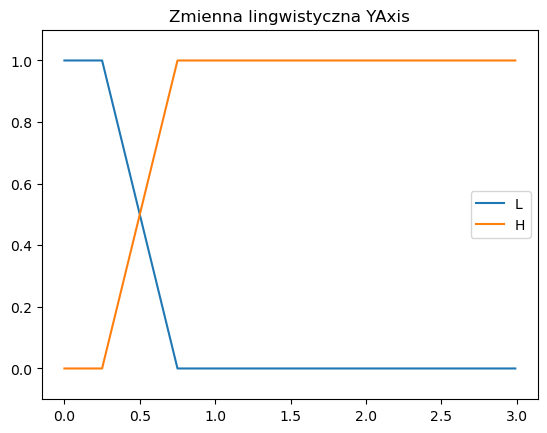

In [3]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

#mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
#varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
#varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])

#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

Parametry początkowe:
Przesłanki:  [[0.5, 0.5], [0.5, 0.5]] 
Konkluzje:  [[0.69403965 0.18643872 0.78628113]
 [0.73539467 0.31324778 0.49120982]
 [0.03628119 0.77557836 0.52787152]
 [0.2866003  0.37399241 0.23219286]]


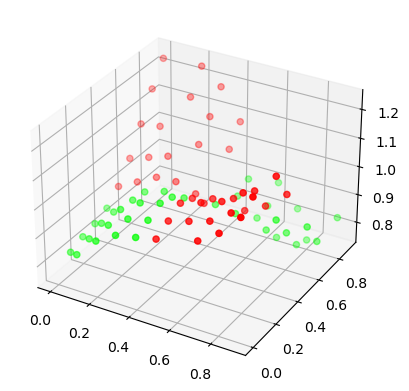

In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

<H1>Uczenie systemu ANFIS</H1>

 20%|██        | 2008/10000 [00:47<02:38, 50.48it/s]E:\!SIiUM2\MSI\swarmEngine.py:53: RuntimeWarning: overflow encountered in multiply
  self.velocities = self.weight * self.velocities + self.c1 * r1 * (self.best_positions - self.positions) + \
100%|██████████| 10000/10000 [03:24<00:00, 48.96it/s]


Optymalizacja zakończona!
z blędem:   26.54271342836028
Liczba it:  10000
TIME elapsed:  204.26198840141296


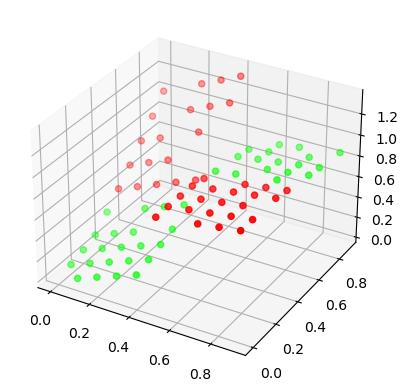

In [5]:
start = time.time()
fis.train(True, True, False, True, n_iter=10000, n_units=100, exploration_iters=250)
end = time.time()
print("TIME elapsed: ", end - start)
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

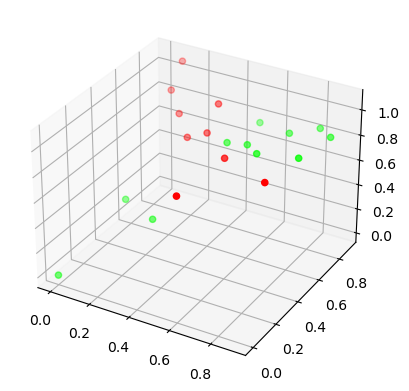

In [6]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
# print(confusion_matrix(y_test, y_pred))

In [7]:
print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

Parametry początkowe:
Przesłanki:  [[0.40512459 0.01024917]
 [1.67108843 2.75101496]] 
Konkluzje:  [[7.18590818e-01 4.26315105e-01 4.52816549e-10]
 [2.68202679e-01 1.42590616e-07 7.54295759e-01]
 [1.29544505e+00 1.30903770e+00 1.98842574e+00]
 [2.89062955e-01 1.25398061e-01 4.94375503e-08]]


<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

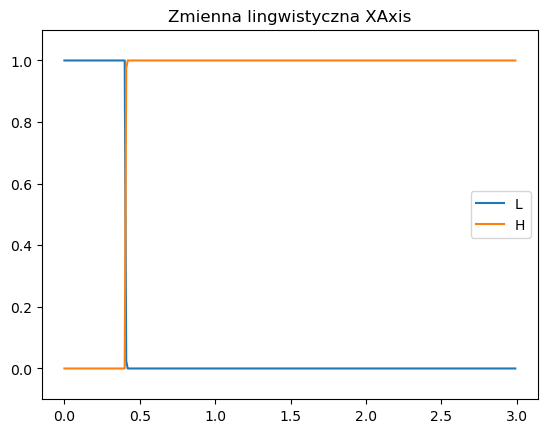

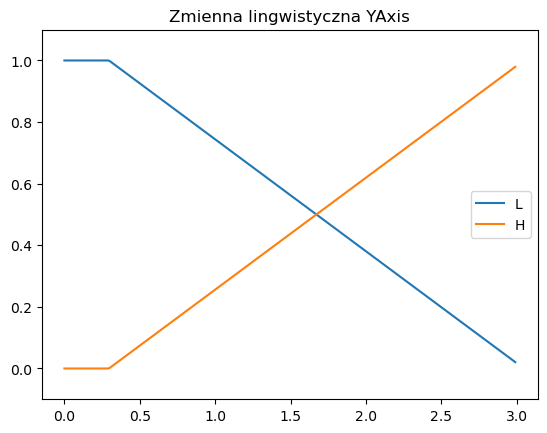

In [8]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()

plt.figure()
varY.show()
plt.legend()

plt.show()

In [9]:
print("Parametry końcowe:\nPrzesłanki: ", repr(fis.premises), "\nKonkluzje: ", repr(fis.tsk))

Parametry końcowe:
Przesłanki:  array([[0.40512459, 0.01024917],
       [1.67108843, 2.75101496]]) 
Konkluzje:  array([[7.18590818e-01, 4.26315105e-01, 4.52816549e-10],
       [2.68202679e-01, 1.42590616e-07, 7.54295759e-01],
       [1.29544505e+00, 1.30903770e+00, 1.98842574e+00],
       [2.89062955e-01, 1.25398061e-01, 4.94375503e-08]])


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

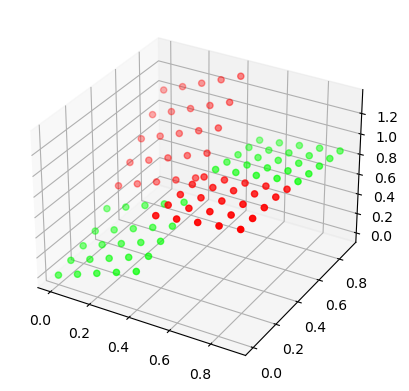

In [10]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

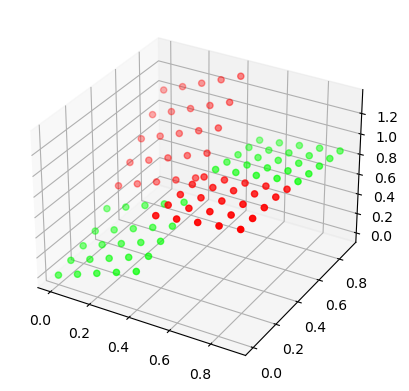

In [11]:
# fis.premises = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

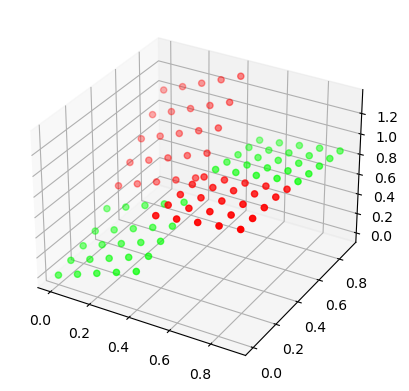

In [12]:
# fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

In [13]:
%matplotlib auto

Using matplotlib backend: <object object at 0x0000019896E6E4C0>


In [14]:
%matplotlib inline

In [15]:
def train_multiplication_table(n=2):
    x = np.arange(1, n, 0.1)
    x,y = np.meshgrid(x, x)

    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.multiply(np.round(dataX), np.round(dataY))

    mf1 = [[n+1, 0.25, 0.5, 0.5] for n in range(n)]
    labels = [str(n+1) for n in range(n)]
    varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", labels)
    varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", labels)

    X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2)

    fis = ANFIS([varX, varY], X_train.T, y_train)

    start = time.time()
    result = fis.train(True, True, False, True, n_iter=10000, n_units=100, exploration_iters=250)
    end = time.time()
    elapsed = end - start
    print("TIME elapsed: ", elapsed)

    fis.training_data = dataXY.T
    fis.expected_labels = data_labels
    fis.show_results()
    print("Parametry koncowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

    return result, elapsed

  0%|          | 0/10000 [00:00<?, ?it/s]E:\!SIiUM2\MSI\swarmANFIS.py:91: RuntimeWarning: invalid value encountered in divide
  Rnorm = R / Rsum
100%|██████████| 10000/10000 [03:26<00:00, 48.35it/s]


Optymalizacja zakończona!
z blędem:   20.660050549414365
Liczba it:  10000
TIME elapsed:  206.86496663093567


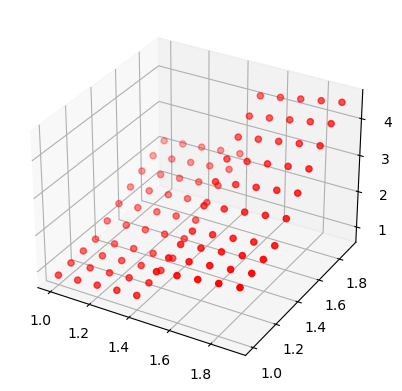

Parametry koncowe:
Przesłanki:  [[[1.47200894 1.17788001 0.31894473 2.36656567]
  [1.17001923 0.59036957 0.7630204  0.03308425]]

 [[1.87964442 1.46902278 0.15651971 1.10563919]
  [2.72977438 0.41271785 1.22356196 1.27060289]]] 
Konkluzje:  [[6.76437475e-01 7.49695943e-01 2.53907542e-02]
 [4.40232865e-16 1.34258527e-01 7.53415728e-02]
 [1.59544835e+00 1.86621471e+00 1.53752251e+00]
 [5.56502993e-01 6.63312817e-02 6.24803114e-01]]


100%|██████████| 10000/10000 [05:25<00:00, 30.74it/s]


Optymalizacja zakończona!
z blędem:   202.39454897138822
Liczba it:  10000
TIME elapsed:  325.3410358428955


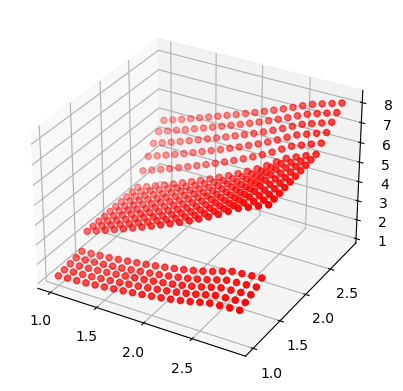

Parametry koncowe:
Przesłanki:  [[[2.46769909e-01 1.79943938e-01 3.01744311e-01 2.23405202e+00]
  [7.56974751e-01 1.01770175e+00 3.33522335e+00 1.30570645e+00]
  [1.71305322e+00 2.20982030e+00 1.44688927e+00 2.17656801e+00]]

 [[3.05459957e+00 1.53967968e-04 6.53975670e-01 1.55127881e+00]
  [2.53760557e+00 2.13607720e+00 6.95669660e-02 2.12108107e+00]
  [1.27777235e+00 2.25486098e-01 4.09130777e-01 9.48460435e-03]]] 
Konkluzje:  [[1.34523868e+00 1.63308088e+00 1.42898681e+00]
 [1.68720296e+00 1.43488966e+00 1.83437636e+00]
 [7.45659066e-01 1.99987374e+00 1.75387411e+00]
 [1.04508685e+00 1.80786656e-04 1.03050496e+00]
 [1.84980937e+00 6.06369224e-05 3.40688208e-01]
 [1.99956243e+00 3.69689453e-01 4.01117032e-06]
 [4.02354320e-06 2.31932006e-01 1.22380463e+00]
 [4.61295603e-01 1.91543357e-01 1.10447063e-02]
 [3.85577243e-01 1.16140161e+00 1.81240140e-01]]


100%|██████████| 10000/10000 [08:02<00:00, 20.72it/s]


Optymalizacja zakończona!
z blędem:   534.4531713932786
Liczba it:  10000
TIME elapsed:  482.6529219150543


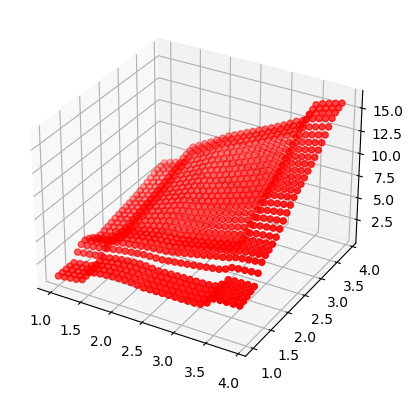

Parametry koncowe:
Przesłanki:  [[[2.99608375 1.74870299 0.76807624 1.08746219]
  [0.60199597 2.07685283 0.2963373  1.55225962]
  [3.15047436 0.24219183 2.08777812 0.23411342]
  [1.58698047 0.17265464 0.07505585 0.70977888]]

 [[0.21759268 0.04944554 1.12228938 0.68554979]
  [1.19533352 1.40701608 0.96300753 1.7248244 ]
  [3.03897945 1.00596577 1.05072107 1.892808  ]
  [1.65683153 0.03871675 0.23743912 0.35435815]]] 
Konkluzje:  [[8.48748494e-01 1.86700094e+00 3.03643074e-01]
 [8.66224230e-01 1.85905282e+00 9.12834645e-01]
 [9.35809881e-01 1.49774685e+00 1.47427774e+00]
 [5.81971559e-01 2.44589492e-01 9.05574547e-01]
 [2.16752160e-01 1.43513186e+00 1.68417426e+00]
 [8.47066351e-01 4.17990461e-06 2.57800158e-05]
 [1.25903343e-01 8.96793942e-01 3.21581996e-01]
 [1.60171192e+00 5.63011164e-01 5.76598849e-01]
 [1.99905307e+00 1.99985556e+00 2.23593506e-01]
 [4.85491522e-01 6.64461316e-01 4.94979954e-01]
 [1.33809917e+00 1.42589439e+00 8.59706057e-01]
 [1.45048479e+00 9.71904095e-01 1.82321

100%|██████████| 10000/10000 [21:51<00:00,  7.63it/s]


Optymalizacja zakończona!
z blędem:   1350.245292344006
Liczba it:  10000
TIME elapsed:  1311.5015008449554


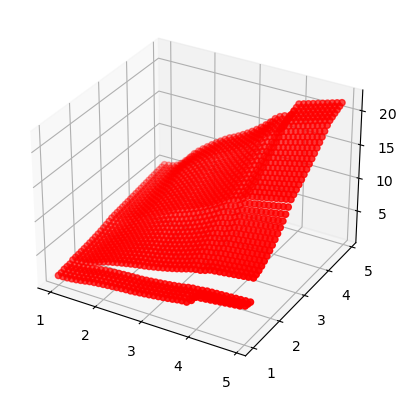

Parametry koncowe:
Przesłanki:  [[[2.61500202e+00 3.59113781e-04 3.89532694e+00 1.03549793e+00]
  [9.40982050e-03 2.22655225e+00 7.76808299e-04 2.39055894e+00]
  [1.15283707e-01 2.24725360e+00 1.88718851e+00 4.68942596e-01]
  [3.83812248e+00 9.14525641e-02 2.41059549e+00 2.53442800e-02]
  [2.56718151e+00 1.52427240e-01 1.25476066e+00 3.72979843e+00]]

 [[2.68542497e+00 2.56839711e+00 2.82936965e-04 3.99696106e+00]
  [5.12029832e-01 2.24335443e+00 4.73264263e-01 1.25985114e+00]
  [5.68401321e-01 8.32478872e-01 2.44150977e-01 8.43172257e-01]
  [1.95715587e-03 9.26197287e-01 1.38589323e+00 3.88299493e+00]
  [1.27228107e-01 2.14005567e+00 2.56070488e+00 2.98134039e-04]]] 
Konkluzje:  [[1.95031380e+00 5.86721552e-01 1.75038916e+00]
 [3.31047934e-01 5.45868317e-01 7.19685092e-01]
 [4.64516932e-01 9.78020476e-01 1.60100986e-04]
 [1.99855005e+00 1.57156250e+00 1.12748200e+00]
 [2.00000000e+00 2.00000000e+00 1.94339488e+00]
 [3.97105390e-02 5.12160892e-01 6.81957234e-01]
 [1.97957726e+00 8.3153

In [16]:
times = [train_multiplication_table(n) for n in range(2, 6)]

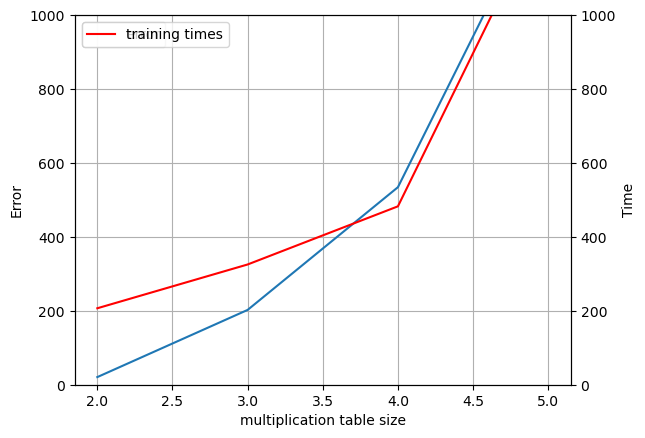

In [17]:
fig = plt.figure()
x = np.arange(2, 6, 1)
# Plotting dataset_2
ax = fig.add_subplot(111)
errors = [t[0] for t in times]
times = [t[1] for t in times]

ax.plot(x, errors, '-', label='error')

# Creating Twin axes for dataset_1
ax2 = ax.twinx()
ax2.plot(x, times, '-r', label='training times')

ax.legend(loc=0)
ax2.legend(loc=0)

ax.grid()

ax.set_xlabel("multiplication table size")
ax.set_ylabel(r"Error")
ax2.set_ylabel(r"Time")

# Setting Y limits
ax.set_ylim(0, 1000)
ax2.set_ylim(0, 1000)

# Show plot
plt.show()


In [18]:
times

[206.86496663093567, 325.3410358428955, 482.6529219150543, 1311.5015008449554]

In [19]:
errors

[20.660050549414365, 202.39454897138822, 534.4531713932786, 1350.245292344006]